In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import TSNE

import seaborn as sns

def randomize_index(X0, y):
  train_idx = np.random.permutation(len(y))
  X0 = X0[train_idx]
  y = y[train_idx]
  return X0, y

Mounted at /content/drive


In [ ]:
item_names = ['Asahi_Fruit_Milk',
              'Kabaya_Fruit_Soda',
              'Kanro_Matcha_Latte',
              'Kasugai_Grape_Strawberry_Muscat',
              'Kasugai_Lychee_Mango_Strawberry',
              'Kasugai_Manuka_Honey',
              'Kasugai_Matcha_Milk',
              'Kasugai_Muscat',
              'Kasugai_Sumiyaki_Coffee',
              'Kasugai_Watermelon',
              'Kopiko_Cappuccino',
              'Mammos_Korean_Ginseng',
              'Matdongsan_Peanut_Crunch',
              'Nobel_Melon',
              'Nobel_Milk',
              'Nobel_Red_Bean',
              'Pepero_Almond',
              'Plushy_Cow_Milk',
              'Plushy_Cow_Strawberry',
              'Pocky_Chocolate_9_Pack',
              'Pocky_Matcha',
              'Pocky_Strawberry_9_Pack',
              'Sakkuto_Matcha',
              'Choco_Mont',
              'Buldak_Instant',
              'Halo_Green_Laver',
              'HMart_Laver_Chip',
              'Imuraya_Castella_Matcha',
              'Imuraya_Castella_Original',
              'Orion_Marine_Boy',
              'JBasket_Boba_Black',
              'JBasket_Boba_Matcha',
              'JBasket_Boba_Taro',
              'Gunpang',
              'Jujube_Tea',
              'Korean_Red_Ginseng_Candy_Gold',
              'Korean_Red_Ginseng_Jelly_Gold',
              'Honey_Butter_Chip',
              'Solomons_Seal_Tea',
              'Young_Ji_Tea',
              'Chrysanthemum_Tea',
              'Shin_Original',
              'Shin_Gold',
              'Bibimmyun',
              'Chapaghetti',
              'Neoguri',
              'Buldak_2x',
              'MNM_Mint',
              'Smoked_Flavor_Grilled_Squid',
              'Vitamin_Code_Grow_Bone']

In [ ]:
# =========================================
# loading validation/testing data
# =========================================
directory_name = '/content/drive/MyDrive/Item Image Data 120/'

# specify how many classes to classify
num_classes = len(item_names)
for i in range(num_classes):
  directory = directory_name + item_names[i] + '_120_Test.npz'
  data = np.load(directory)
  if i == 0:
    Xtest = data['X']
    ytest = i*np.ones( (len(data['X']), 1) )
  else:
    Xtest = np.vstack(( Xtest, data['X'] ))
    ytest = np.vstack( (ytest, i*np.ones( (len(data['X']), 1) )) )

y = ytest
ytest = to_categorical(ytest)
print('Xtest:\ndata type',Xtest.dtype, '\ntakes up:',Xtest.nbytes/1073741824, 'GB')

Xtest:
data type float16 
takes up: 0.20116567611694336 GB


(-0.5, 119.5, 119.5, -0.5)

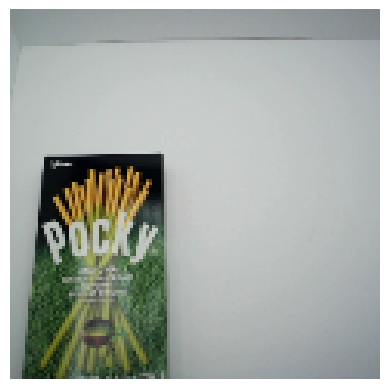

In [ ]:
plt.imshow(data['X'][22].astype(np.float32))
plt.axis('off')

In [ ]:
# =========================================
# loading training data
# =========================================

randidx = np.random.permutation(408)

# select "data_count" number of random image samples for training from each class
data_count = 408
augment_data = 0

for i in range(num_classes):
  # directory = directory_name + item_names[20] + '_120.npz'
  # data = np.load(directory)

  if i == 0:
    #Xtrain = data['X'][randidx[:data_count]]
    ytrain = i*np.ones( (data_count, 1))

  else:
    #Xtrain = np.vstack(( Xtrain, data['X'][randidx[:data_count]] ))
    ytrain = np.vstack( (ytrain, i*np.ones( (data_count, 1) )) )

ytrain = to_categorical(ytrain)
#Xtrain, ytrain = randomize_index(Xtrain, ytrain)

#print('Xtrain:\ndata type:',Xtrain.dtype, '\ntakes up:',Xtrain.nbytes/1073741824, 'GB')

In [ ]:
save_dir = '/content/drive/MyDrive/Price Checker Models/'
save_name = 'M50_87480.h5'
model = load_model(save_dir + save_name)

desired_layer_output = model.get_layer('flatten').output
feature_extraction_model = tf.keras.Model(inputs=model.input, outputs=desired_layer_output)

Xtest_ls = np.array(feature_extraction_model.predict(Xtest))

79/79 [==============================] - 2s 19ms/step


In [ ]:
data = np.load('/content/filename.npz')
X = data['X']

cc = model.predict(X)
ccc = np.argmax(cc, axis = 1)
right = (np.array(np.where(ccc == 20))[0])
print(ccc)

for i in range(len(right)-2):
  plt.imshow(X[right[i]].astype(np.float32))
  plt.axis('off')
  plt.show()

In [ ]:
model.summary()

In [ ]:
Xtrain_ls = np.array(feature_extraction_model.predict(Xtrain[:5100]))
np.savez('/content/drive/MyDrive/Price Checker Models/Xtrain_ls_1.npz', Xtrain_ls = Xtrain_ls)
Xtrain_ls = np.array(feature_extraction_model.predict(Xtrain[5100:10200]))
np.savez('/content/drive/MyDrive/Price Checker Models/Xtrain_ls_2.npz', Xtrain_ls = Xtrain_ls)
Xtrain_ls = np.array(feature_extraction_model.predict(Xtrain[10200:15300]))
np.savez('/content/drive/MyDrive/Price Checker Models/Xtrain_ls_3.npz', Xtrain_ls = Xtrain_ls)
Xtrain_ls = np.array(feature_extraction_model.predict(Xtrain[15300:]))
np.savez('/content/drive/MyDrive/Price Checker Models/Xtrain_ls_4.npz', Xtrain_ls = Xtrain_ls)

13/13 [==============================] - 2s 198ms/step



KeyboardInterrupt



In [ ]:
yhat = np.argmax(model.predict(Xtest), axis = 1)

79/79 [==============================] - 2s 19ms/step


In [ ]:
print(classification_report(y, yhat))
recall = recall_score(y.flatten(), yhat, average = None)
bad_items = np.array(np.where(recall < 0.75)).flatten()

for i in range(len(bad_items)):
  print(item_names[bad_items[i]])

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92        50
         1.0       0.90      0.90      0.90        50
         2.0       0.75      0.94      0.83        50
         3.0       0.81      0.76      0.78        50
         4.0       0.89      0.64      0.74        50
         5.0       0.98      0.96      0.97        50
         6.0       0.88      0.86      0.87        50
         7.0       0.95      0.76      0.84        50
         8.0       0.96      0.98      0.97        50
         9.0       0.86      0.76      0.81        50
        10.0       1.00      0.76      0.86        50
        11.0       1.00      0.86      0.92        50
        12.0       0.96      0.92      0.94        50
        13.0       0.98      0.92      0.95        50
        14.0       0.98      0.84      0.90        50
        15.0       0.98      0.88      0.93        50
        16.0       1.00      0.90      0.95        50
        17.0       1.00    

In [ ]:
Xtrain_ls = np.load('/content/drive/MyDrive/Price Checker Models/Xtrain_ls_1.npz')['Xtrain_ls']
Xtrain_ls = np.vstack((Xtrain_ls, np.load('/content/drive/MyDrive/Price Checker Models/Xtrain_ls_2.npz')['Xtrain_ls']))
Xtrain_ls = np.vstack((Xtrain_ls, np.load('/content/drive/MyDrive/Price Checker Models/Xtrain_ls_3.npz')['Xtrain_ls']))
Xtrain_ls = np.vstack((Xtrain_ls, np.load('/content/drive/MyDrive/Price Checker Models/Xtrain_ls_4.npz')['Xtrain_ls']))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

rf_classifier = RandomForestClassifier(n_estimators = 20)
rf_classifier.fit(scaler.fit_transform(Xtrain_ls), ytrain)

yhat_rfc = np.argmax(rf_classifier.predict(scaler.fit_transform(Xtest_ls)), axis = 1)
accuracy_rfc = accuracy_score(y, yhat_rfc)
print(accuracy_rfc)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier

gb_classifier = GradientBoostingClassifier(n_estimators = 30, learning_rate=0.1, max_depth=10)
gb_classifier.fit(scaler.fit_transform(Xtrain_ls), np.argmax(ytrain, axis=  1))

yhat_gbc = (gb_classifier.predict(Xtest_ls))
accuracy_gbc = accuracy_score(y, yhat_gbc)
print(accuracy_gbc)

print(classification_report(y, yhat_rfc))
print(yhat_rfc[-100:-50])

In [ ]:
colorvec = ['darkred','firebrick','red','orangered', 'tomato','salmon','pink','hotpink',
            'deeppink','magenta','violet','mediumorchid','darkviolet','mediumslateblue','blue',
            'navy','dodgerblue','aqua','turquoise','springgreen','lime','seagreen','yellow','black',
            'gold','peru', 'lightseagreen','teal','steelblue','lawngreen','darkseagreen','yellowgreen',
            'crimson','saddlebrown','brown','rosybrown', 'thistle','tan','navajowhite','lightcoral',
            'darkolivegreen','olive','goldenrod','darkgoldenrod','grey','slategray','palevioletred',
            'purple','lightskyblue','cadetblue']

In [ ]:
kpca = KernelPCA(kernel='cosine', n_components=2)
kpca.fit(Xtrain_ls)
pca_train = kpca.transform(Xtrain_ls)

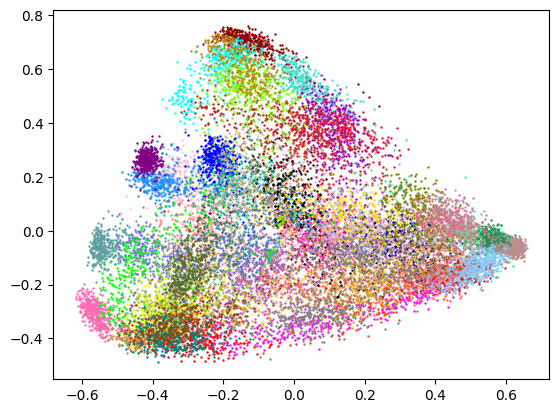

In [ ]:
#plt.scatter(pca_train[:,0], pca_train[:,1])

for i in range(50):
  plt.scatter(pca_train[i*408:(i+1)*408, 0],
              pca_train[i*408:(i+1)*408, 1],
              marker='.',
              color = colorvec[i],
              s = 2)

In [ ]:
# TSNE data separation
tsne = TSNE(n_components = 2, random_state = 37)
embedded_data_train = tsne.fit_transform(Xtrain_ls)

In [ ]:
# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components = 50, random_state = 37)
gmm.fit(embedded_data_train)
labels = gmm.predict(embedded_data_train)

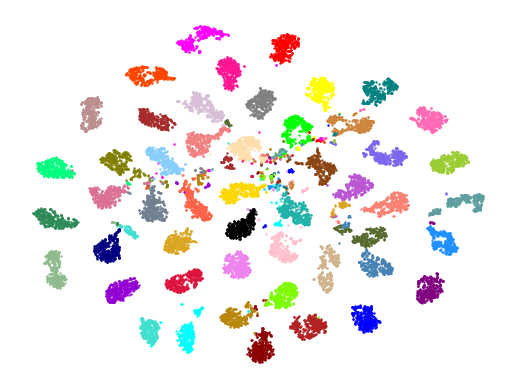

In [ ]:
pca = PCA(n_components=2)
pca.fit(embedded_data_train)
transformed_data = pca.transform(embedded_data_train)

for i in range(50):
  plt.scatter(transformed_data[i*408:(i+1)*408, 0],
              transformed_data[i*408:(i+1)*408, 1],
              marker='.',
              color = colorvec[i],
              s = 2)
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.axis('off')
plt.show()

gmm = GaussianMixture(n_components = 50, random_state = 37)
gmm.fit(transformed_data)
labels = gmm.predict(transformed_data)
plt.scatter(embedded_data_train[:, 0],
            embedded_data_train[:, 1], c = labels, s = 10, cmap='coolwarm', alpha=0.7)
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster')
plt.show()

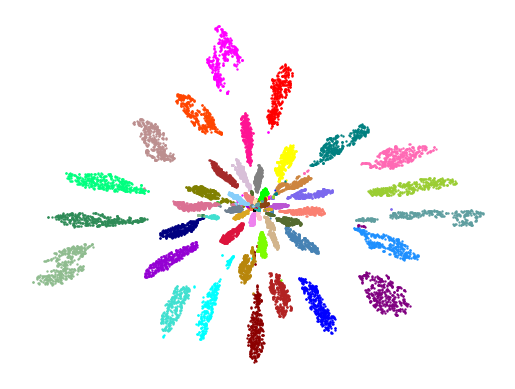

In [ ]:
# KPCA
kpca = KernelPCA(kernel='poly', n_components=2)
embedded_data_kpca = kpca.fit_transform(embedded_data_train)

for i in range(50):
  plt.scatter(embedded_data_kpca[i*408:(i+1)*408, 0],
              embedded_data_kpca[i*408:(i+1)*408, 1],
              marker='.',
              color = colorvec[i],
              s = 2)
plt.xlabel('KPCA component 1')
plt.ylabel('KPCA component 2')
plt.axis('off')
plt.show()

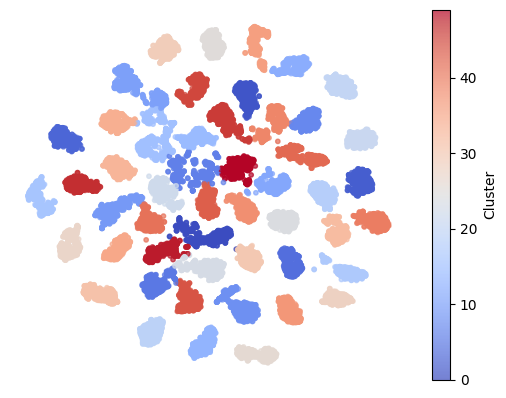

In [ ]:
for i in range(50):
  plt.scatter(embedded_data_train[i*408:(i+1)*408, 0],
              embedded_data_train[i*408:(i+1)*408, 1],
              marker='.',
              color = colorvec[i],
              s = 2)
  plt.axis('off')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.show()

# GMM Cluster Data
plt.scatter(embedded_data_train[:, 0],
            embedded_data_train[:, 1], c = labels, s = 10, cmap='coolwarm', alpha=0.7)
plt.axis('off')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster')
plt.show()

Text(0, 0.5, 'latent space magnitude')

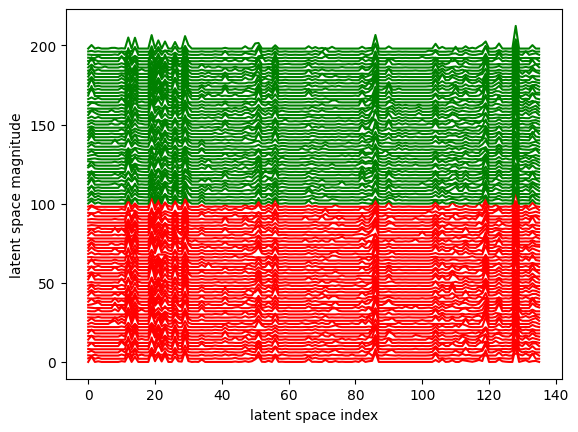

In [ ]:
for i in range(50):
  if i == 0:
    plt.plot(Xtrain_ls[i,:]+i*2, color='red', label = 'train')
  else:
    plt.plot(Xtrain_ls[i,:]+i*2, color='red')
for i in range(50):
  if i == 0:
    plt.plot(Xtest_ls[i,:]+i*2+100, color='green', label = 'test')
  else:
    plt.plot(Xtest_ls[i,:]+i*2+100, color='green')
plt.xlabel('latent space index')
plt.ylabel('latent space magnitude')

In [ ]:
scaler = StandardScaler()
Xtrain_lsavg = np.zeros((50, 136))
for i in range(50):
  Xtrain_lsavg[i, :] = scaler.fit_transform((np.sum(Xtrain_ls[i*408:(i+1)*408, :], axis = 0)/408).reshape(-1,1)).flatten()

In [ ]:
# LASSO 4, 38
import time

# model.evaluate(np.vstack((Xtest[200:250], Xtest[38*50:39*50])),
#                np.vstack((ytest[200:250], ytest[38*50:39*50])))
# yhat0 = np.argmax(model.predict(np.vstack((Xtest[200:250], Xtest[38*50:39*50]))), axis= 1)

# plt.plot(np.vstack((y[200:250], y[38*50:39*50])), 'go', markersize = 7, label ='actual')
# plt.plot(yhat0, 'ro', markersize = 3, label= 'CNN prediction')
# plt.xlim(0, 50)
# plt.legend()
# plt.xlabel('test image index')
# plt.ylabel('predicted label')
# plt.show()

ss = time.time()
ntest = 50
accuracy = 0
sumvec = np.zeros((100, 50))
prediction = np.zeros(50)

itemidx = 38
for itemidx in range(50):
  accuracy = 0
  sumvec = np.zeros((100, 50))
  prediction = np.zeros(50)
  for i in range(ntest):
    lasso_model = Lasso(alpha = 0.07, max_iter = 10000)
    lasso_model.fit(Xtrain_ls.T, Xtest_ls[50*itemidx+i].T)
    coefficients = lasso_model.coef_
    for j in range(50):
      sumvec[i,j] = np.sum(coefficients[j*408:(j+1)*408])

    prediction[i] = np.argmax(sumvec[i])
    if prediction[i] == y[50*itemidx+i]:
      accuracy += 1
  print(f'{itemidx}: {accuracy/50}')

print(time.time() - ss)

0: 0.88
1: 0.94
2: 0.92
3: 0.8
4: 0.86
5: 0.92
6: 0.74
7: 0.86
8: 0.94
9: 0.92
10: 0.94
11: 0.96
12: 0.9
13: 0.98
14: 0.94
15: 0.94
16: 0.98
17: 0.9
18: 0.76
19: 0.88
20: 0.7
21: 0.9
22: 0.92
23: 0.86
24: 0.9
25: 0.58
26: 0.7
27: 0.9
28: 0.82
29: 0.94
30: 1.0
31: 1.0
32: 0.96
33: 0.82
34: 0.8
35: 0.98
36: 0.8
37: 1.0
38: 0.12
39: 0.34
40: 0.94
41: 0.8
42: 0.9
43: 0.94
44: 0.92
45: 0.9
46: 1.0
47: 1.0
48: 0.92
49: 0.98
1569.8383541107178


In [ ]:
lasso_acc = np.array([0.88,0.94,0.92,0.8,0.86,0.92,
             0.74,0.86,0.94,0.92,0.94,0.96,
             0.9,0.98,0.94,0.94,0.98,0.9,
             0.76,0.88,0.7,0.9,0.92,0.86,
             0.9,0.58,0.7,0.9,0.82,0.94,
             1.0,1.0,0.96,0.82,0.8,0.98,
             0.8,1.0,0.12,0.34,0.94, 0.8,
             0.9,0.94,0.92,0.9,1.0,1.0,
             0.92, 0.98])
yhat = np.argmax(model.predict(Xtest), axis =1)
y = y.flatten()

from sklearn.metrics import confusion_matrix

# Assuming y_true are the true labels and y_pred are the predicted labels
conf_matrix = confusion_matrix(y, yhat)

# Calculate accuracy per class
num_classes = len(conf_matrix)
class_accuracy = {}
for i in range(num_classes):
    class_accuracy[i] = conf_matrix[i, i] / conf_matrix[i].sum()

# Print accuracy per class
for class_label, accuracy in class_accuracy.items():
    print(f"Class {class_label}: {accuracy}")

CNN_acc = np.array(list(class_accuracy.values()))

print(CNN_acc.reshape(-1,1))

79/79 [==============================] - 2s 30ms/step


Text(0.5, 1.0, 'Histogram with 50 Labels')

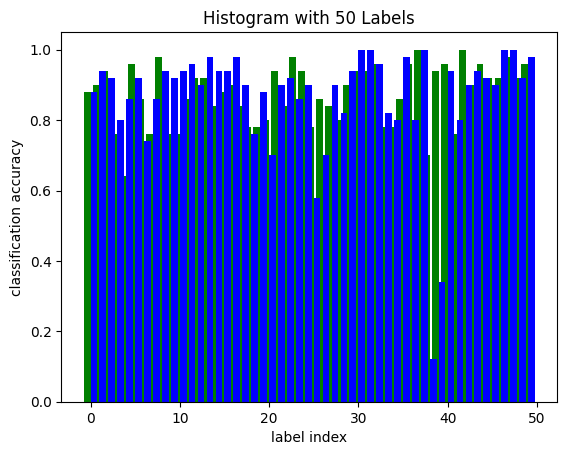

In [ ]:
fig, ax = plt.subplots()

x = np.arange(50)
width = 0.75

bars1 = ax.bar(x - width/2, CNN_acc, width, label='Data 1', color='green')
bars2 = ax.bar(x + width/2, lasso_acc, width, label='Data 2', color='blue')

# Add labels and title
plt.xlabel('label index')
plt.ylabel('classification accuracy')
plt.title('Histogram with 50 Labels')

In [ ]:
dropout = 0.33
model = Sequential()
model.add(Dense(100, activation='relu')),
model.add(Dropout(dropout))
model.add(Dense(100, activation='relu'))
model.add(Dropout(dropout))
# model.add(Dense(96, activation='relu'))
# model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0004, beta_1 = 0.6)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(Xtrain_ls, ytrain,
          epochs = 15, batch_size = 24,
          validation_data = (Xtest_ls, ytest))

Epoch 1/15
850/850 [==============================] - 4s 3ms/step - loss: 2.0430 - accuracy: 0.4517 - val_loss: 0.8158 - val_accuracy: 0.7884
Epoch 2/15
850/850 [==============================] - 3s 3ms/step - loss: 0.6607 - accuracy: 0.8082 - val_loss: 0.5345 - val_accuracy: 0.8412
Epoch 3/15
850/850 [==============================] - 3s 3ms/step - loss: 0.4095 - accuracy: 0.8782 - val_loss: 0.4717 - val_accuracy: 0.8568
Epoch 4/15
850/850 [==============================] - 2s 2ms/step - loss: 0.2980 - accuracy: 0.9105 - val_loss: 0.4948 - val_accuracy: 0.8516
Epoch 5/15
850/850 [==============================] - 2s 2ms/step - loss: 0.2324 - accuracy: 0.9311 - val_loss: 0.4447 - val_accuracy: 0.8636
Epoch 6/15
850/850 [==============================] - 2s 2ms/step - loss: 0.1921 - accuracy: 0.9415 - val_loss: 0.5012 - val_accuracy: 0.8600
Epoch 7/15
850/850 [==============================] - 2s 2ms/step - loss: 0.1629 - accuracy: 0.9496 - val_loss: 0.4989 - val_accuracy: 0.8644
Epoch 